In [29]:
#linear regression is a machine learning algorithm that is used to solve a supervised learning regresionsional problem
#sklearn is a machine learning library
#ipywidgets is another python libary

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge
from ipywidgets import Dropdown,FloatSlider,IntSlider,interact

In [5]:
Nig_house=pd.read_csv('Nig_house_price_dataset.csv')
Nig_house

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0
...,...,...,...,...,...,...,...,...
24321,2,2,2,4,Block of Flats,Kabusa,Abuja,15000000.0
24322,4,5,5,4,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [6]:
#checking the last 10 row of this dataset
Nig_house.head(10)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0
5,5,5,6,1,Detached Duplex,Lekki,Lagos,450000000.0
6,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000.0
7,2,2,3,6,Detached Bungalow,Epe,Lagos,12000000.0
8,1,1,1,1,Detached Duplex,Lekki,Lagos,200000000.0
9,4,4,5,5,Detached Duplex,Ajah,Lagos,60000000.0


In [7]:
Nig_house.tail(10)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
24316,5,5,6,5,Detached Duplex,Lekki,Lagos,3.200000e+08
24317,4,4,5,3,Terraced Duplexes,Lekki,Lagos,7.500000e+07
24318,4,5,5,4,Semi Detached Duplex,Lekki,Lagos,1.100000e+08
24319,8,8,9,4,Detached Duplex,Guzape District,Abuja,1.000000e+09
24320,3,4,4,5,Detached Duplex,Lekki,Lagos,8.000000e+07
24321,2,2,2,4,Block of Flats,Kabusa,Abuja,1.500000e+07
24322,4,5,5,4,Block of Flats,Ado-Odo/Ota,Ogun,2.500000e+07
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,6.800000e+07
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,7.800000e+07
24325,4,5,5,4,Detached Duplex,Lekki,Lagos,6.500000e+07


In [8]:
Nig_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  int64  
 1   bathrooms      24326 non-null  int64  
 2   toilets        24326 non-null  int64  
 3   parking_space  24326 non-null  int64  
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


In [9]:
state_no = Nig_house['state'].nunique()
print(f"There are {state_no} unique states in the dataset")
print()

There are 25 unique states in the dataset



In [10]:
town_no = Nig_house['town'].nunique()
print(f"There are {town_no} uniuque towns in the dataset")
print()

There are 189 uniuque towns in the dataset



In [11]:
newColumn=Nig_house[['state', 'town']].nunique()
newColumn

state     25
town     189
dtype: int64

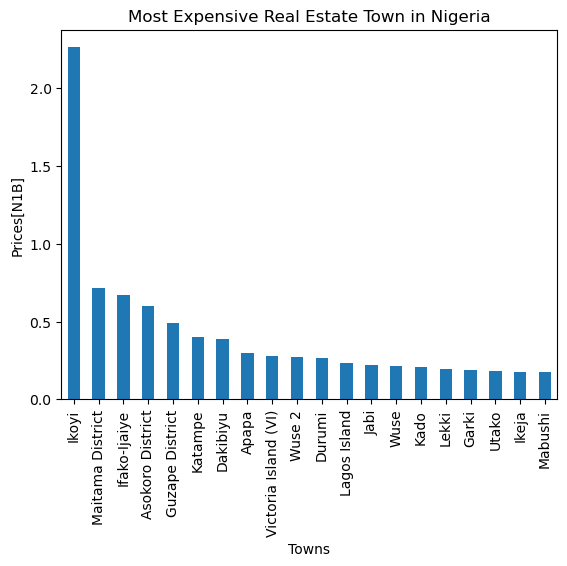

In [12]:
((Nig_house.groupby('town')['price'].mean()/1e9).sort_values(ascending= False).head(20).plot(kind='bar',xlabel='Towns',ylabel='Prices[N1B]',title='Most Expensive Real Estate Town in Nigeria'));

In [13]:
print(Nig_house[Nig_house['town']=='Ikoyi'].max())
print(Nig_house[Nig_house['town']=='Ifako-Ijaiye'].max())

bedrooms                         9
bathrooms                        9
toilets                          9
parking_space                    9
title            Terraced Duplexes
town                         Ikoyi
state                        Lagos
price              1800000000000.0
dtype: object
bedrooms                         7
bathrooms                        8
toilets                          8
parking_space                    8
title            Terraced Bungalow
town                  Ifako-Ijaiye
state                        Lagos
price                55000000000.0
dtype: object


In [14]:
trim_df = q1,q9 = Nig_house['price'].quantile([0.15,0.85])
mask_df = Nig_house['price'].between(q1,q9)
trimmed_df = Nig_house[mask_df]
trimmed_df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0
6,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000.0
8,1,1,1,1,Detached Duplex,Lekki,Lagos,200000000.0
...,...,...,...,...,...,...,...,...
24318,4,5,5,4,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [15]:
few_records=trimmed_df['state'].value_counts()
few_records

Lagos        13805
Abuja         2462
Rivers         339
Oyo            229
Imo            195
Ogun           141
Enugu           96
Anambara        83
Edo             51
Delta           42
Akwa Ibom       13
Kaduna           8
Ekiti            5
Abia             5
Kogi             4
Nasarawa         4
Osun             3
Kwara            2
Borno            2
Bayelsa          1
Niger            1
Name: state, dtype: int64

In [16]:
trimmed_df=trimmed_df[~trimmed_df['state'].isin(few_records[few_records <100].index)]
trimmed_df['state'].value_counts()

Lagos     13805
Abuja      2462
Rivers      339
Oyo         229
Imo         195
Ogun        141
Name: state, dtype: int64

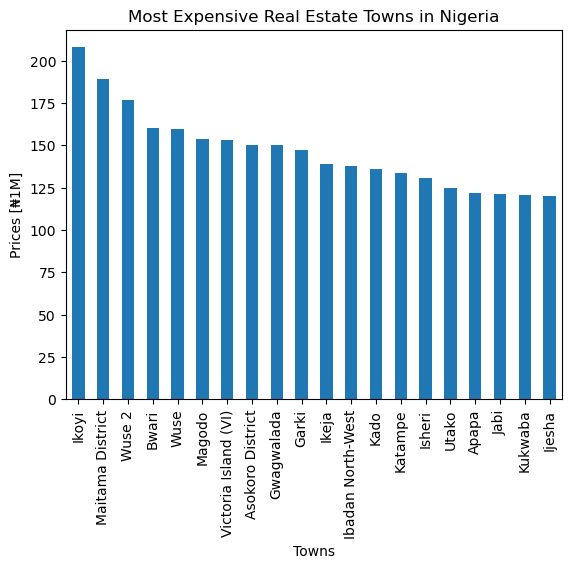

In [17]:
(
    (trimmed_df.groupby("town")['price']
    .mean()/1e6)
    .sort_values(ascending=False)
    .head(20)
    .plot(kind="bar",
         xlabel = 'Towns',
         ylabel = "Prices [₦1M]",
         title = "Most Expensive Real Estate Towns in Nigeria")
);

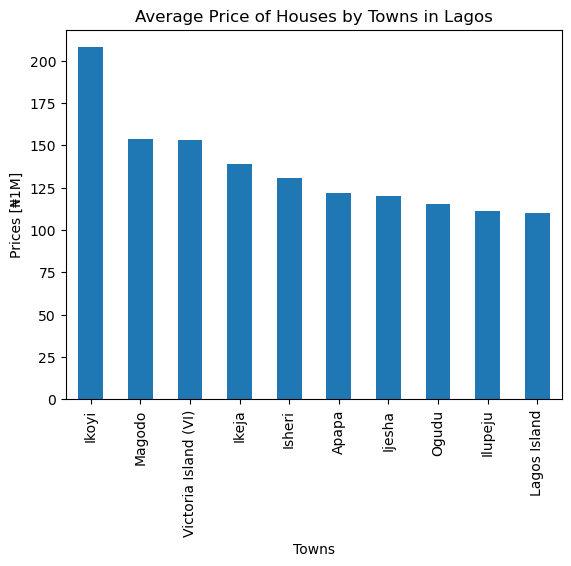

In [18]:
trimmed_df_lagos = trimmed_df[trimmed_df["state"]=="Lagos"]
(
    (trimmed_df_lagos.groupby("town")["price"].mean()/1e6)
    .sort_values(ascending=False)
    .head(10).plot(kind="bar",
                   xlabel = "Towns",
                   ylabel = "Prices [₦1M]",
                   title = "Average Price of Houses by Towns in Lagos"
                  )
);

In [19]:
# checking the number of towns with number of houses in lagos
trimmed_df_lagos["town"].value_counts()

Lekki                   9134
Ajah                    1797
Ikeja                    609
Magodo                   360
Victoria Island (VI)     300
Ikoyi                    255
Ibeju Lekki              193
Isheri North             183
Isolo                    164
Surulere                 106
Alimosho                  92
Yaba                      75
Maryland                  58
Agege                     56
Ojodu                     55
Gbagada                   51
Ikorodu                   49
Ogudu                     43
Amuwo Odofin              40
Ilupeju                   29
Ipaja                     22
Ikotun                    21
Shomolu                   15
Ojo                       15
Isheri                    15
Ketu                      13
Ifako-Ijaiye              13
Oshodi                     9
Ejigbo                     7
Idimu                      4
Kosofe                     3
Lagos Island               3
Agbara-Igbesa              3
Apapa                      3
Ijaiye        

In [20]:
# Resetting the index of lekki dataframe
df_lekki = trimmed_df_lagos[trimmed_df_lagos['town']=="Lekki"].reset_index()
df_lekki.drop(columns=["index", "state"], inplace=True)

In [21]:
# Renaming the title column house_type
df_lekki.rename({"title": "house_type"}, axis = 1, inplace=True)
df_lekki.head()

,bedrooms,bathrooms,toilets,parking_space,house_type,town,price
0,4,5,5,4,Detached Duplex,Lekki,120000000.0
1,4,4,5,2,Semi Detached Duplex,Lekki,75000000.0
2,4,5,5,4,Detached Duplex,Lekki,65000000.0
3,1,1,1,1,Detached Duplex,Lekki,200000000.0
4,4,5,6,3,Semi Detached Duplex,Lekki,65000000.0


In [22]:
df_lekki['total_rooms']=df_lekki['bedrooms']+df_lekki['bathrooms']+df_lekki['toilets']+df_lekki['parking_space']
#swap the psoitions of the price and total_rooms columns
df_lekki['total_rooms']=df_lekki['bedrooms']+df_lekki['bathrooms']+df_lekki['toilets']+df_lekki['parking_space']
#swap the psoitions of the price and total_rooms columns
cols=list(df_lekki.columns)
cols[-1],cols[-2]=cols[-2],cols[-1]
df_lekki=df_lekki[cols]

In [24]:
df_lekki

,bedrooms,bathrooms,toilets,parking_space,house_type,town,total_rooms,price
0,4,5,5,4,Detached Duplex,Lekki,18,120000000.0
1,4,4,5,2,Semi Detached Duplex,Lekki,15,75000000.0
2,4,5,5,4,Detached Duplex,Lekki,18,65000000.0
3,1,1,1,1,Detached Duplex,Lekki,4,200000000.0
4,4,5,6,3,Semi Detached Duplex,Lekki,18,65000000.0
...,...,...,...,...,...,...,...,...
9129,4,4,5,3,Terraced Duplexes,Lekki,16,75000000.0
9130,4,5,5,4,Semi Detached Duplex,Lekki,18,110000000.0
9131,3,4,4,5,Detached Duplex,Lekki,16,80000000.0
9132,4,5,5,4,Detached Duplex,Lekki,18,68000000.0


In [25]:
#drop multi-collinearity and low-cardinality features and feature not correlating with target
df_lekki.drop(columns=['bathrooms','toilets','town','total_rooms'],inplace=True)

In [26]:
trim =q1,q9 = df_lekki['price'].quantile([0.1,0.9])
mask=df_lekki['price'].between(q1,q9)
trimmed_df_lekki=df_lekki[mask]

In [27]:
#checking the house prices in lekki in ascending order
trimmed_df_lekki['price'].sort_values().tail(10)

4899    170000000.0
4942    170000000.0
604     170000000.0
4260    170000000.0
1259    170000000.0
236     170000000.0
1633    170000000.0
232     170000000.0
3418    170000000.0
6309    170000000.0
Name: price, dtype: float64

In [29]:
#splitting the dataset into x and y variable
target = 'price'
features = (trimmed_df_lekki.drop(columns= target)).columns
y = trimmed_df_lekki[target]
x = trimmed_df_lekki[features]
print(x)
print()
print()
print(y)

      bedrooms  parking_space            house_type
0            4              4       Detached Duplex
1            4              2  Semi Detached Duplex
2            4              4       Detached Duplex
4            4              3  Semi Detached Duplex
5            4              4  Semi Detached Duplex
...        ...            ...                   ...
9129         4              3     Terraced Duplexes
9130         4              4  Semi Detached Duplex
9131         3              5       Detached Duplex
9132         4              4       Detached Duplex
9133         4              4       Detached Duplex

[7526 rows x 3 columns]


0       120000000.0
1        75000000.0
2        65000000.0
4        65000000.0
5        70000000.0
           ...     
9129     75000000.0
9130    110000000.0
9131     80000000.0
9132     68000000.0
9133     65000000.0
Name: price, Length: 7526, dtype: float64


In [30]:
#Using the train test split fucntion to split the dataset into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
#Building the model for prediction
model = LinearRegression
model = make_pipeline(OneHotEncoder(),Ridge())
model.fit(x_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()), ('ridge', Ridge())])

In [32]:
# using a function
def make_prediction(bedrooms, parking_space, house_type):
    data = {"bedrooms":bedrooms,
            "parking_space":parking_space,
            "house_type":house_type

    }

    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted apartment price: ₦{prediction}"

In [33]:
# Using the model for making predictions
make_prediction(5, 5, "Block of Flats")

'Predicted apartment price: ₦117299160.91'

In [34]:
interact(
    make_prediction,
    bedrooms=IntSlider(
        min=x_train["bedrooms"].min(),
        max=x_train["bedrooms"].max(),
        value=x_train["bedrooms"].mean(),
    ),
    parking_space=IntSlider(
        min=x_train["parking_space"].min(),
        max=x_train["parking_space"].max(),
        step=1,
        value=x_train["parking_space"].mean(),
    ),
    house_type=Dropdown(options=sorted(x_train["house_type"].unique())),
);

interactive(children=(IntSlider(value=4, description='bedrooms', max=8, min=1), IntSlider(value=3, description…